In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from IPython.display import Audio

## Different attack styles 

The dataset contains benign data and 5 different attack types: 
* 0 - benign 
* 1 - Bruteforce attack 
* 2 - DoS attack  
* 3 - Web attack
* 4 - Inflitration attack 
* 5 - Botnet attack 
* 6 - DDoS attack 

In [2]:
def encode_target(label):
    if label=="Benign":
        return 0 # Benign network traffic
    if "Bruteforce" in label or "BruteForce" in label:
        return 1 # Bruteforce attack
    if "GoldenEye" in label or "Slowloris" in label or "Hulk" in label or "SlowHTTPTest" in label:
        return 2 # DoS attack
    if "Web" in label or "XSS" in label or "SQL" in label:
        return 3 # Web attack
    if "Infilteration" in label:
        return 4 # Infiltration attack
    if "Bot" in label:
        return 5 # Botnet attack 
    if "DDoS" in label or "DDOS":
        return 6 # DDoS attack

In [3]:
def clean_data(data, time=False):
    # Drop Dst Port : REASON TO COME 
    data = data.drop("Dst Port", axis = 1)
    
    # Drop any rows with "Infinity" values or labels with the value "Label"
    data = data.drop(data[data.eq("Infinity").any(1)].index,axis=0)
    data = data.drop(data[data.eq("Label").any(1)].index,axis=0)
    
    # Percent of missing data 
    print("Missing Data:",round(data.isnull().sum().sum()/len(data)*100,3),"%") # Just over 0.2%, very minimal so we can remove this 
    data = data.dropna()

    # Percent of duplicated data
    print("Duplicated Data:", round(len(data[data.duplicated()])/len(data)*100,2),"%")
    data = data.drop_duplicates()

    if not time:
        # Dropping the timestamp feature 
        data = data.drop("Timestamp", axis = 1)

    # One hot encoding the protocol feature 
    data['Protocol'] = data['Protocol'].astype(int)
    dum_df = pd.get_dummies(data["Protocol"],prefix="prot_")
    data = data.drop(["Protocol"],axis=1)
    data = pd.concat([data,dum_df],axis=1) 
    
    data["target"] = np.vectorize(encode_target)(data["Label"])
    data = data.drop("Label", axis = 1)

    return data 

### Brute-force Attacks

In [4]:
bruteforce = pd.read_csv("02-14-2018.csv")

In [5]:
bruteforce['Label'].value_counts()

Benign            667626
FTP-BruteForce    193360
SSH-Bruteforce    187589
Name: Label, dtype: int64

In [6]:
bruteforce = clean_data(bruteforce,time=False)

Missing Data: 0.217 %
Duplicated Data: 21.65 %


In [7]:
bruteforce.head()

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,prot__0,prot__6,prot__17,target
0,112641719,3,0,0,0,0,0,0.000000,0.000000,0,...,0,0,56320859.5,139.300036,56320958,56320761,1,0,0,0
1,112641466,3,0,0,0,0,0,0.000000,0.000000,0,...,0,0,56320733.0,114.551299,56320814,56320652,1,0,0,0
2,112638623,3,0,0,0,0,0,0.000000,0.000000,0,...,0,0,56319311.5,301.934596,56319525,56319098,1,0,0,0
3,6453966,15,10,1239,2273,744,0,82.600000,196.741237,976,...,0,0,0.0,0.000000,0,0,0,1,0,0
4,8804066,14,11,1143,2209,744,0,81.642857,203.745545,976,...,0,0,0.0,0.000000,0,0,0,1,0,0


In [8]:
bruteforce["target"].value_counts()

0    663094
1    156668
Name: target, dtype: int64

### Dos Attacks

In [9]:
dos = pd.concat([pd.read_csv("02-15-2018.csv",low_memory=False), pd.read_csv("02-16-2018.csv",low_memory=False)])

In [10]:
dos["Label"].value_counts()

Benign                      1442849
DoS attacks-Hulk             461912
DoS attacks-SlowHTTPTest     139890
DoS attacks-GoldenEye         41508
DoS attacks-Slowloris         10990
Label                             1
Name: Label, dtype: int64

In [11]:
dos = clean_data(dos)

Missing Data: 0.235 %
Duplicated Data: 7.26 %


In [12]:
dos.head()

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,prot__0,prot__6,prot__17,target
0,112641158,3,0,0,0,0,0,0.0,0.0,0,...,0,0,56320579.0,704.278354,56321077,56320081,1,0,0,0
1,37366762,14,12,2168,2993,712,0,154.857143,254.85527,976,...,1601183,321569,11431221.0,3644990.559845,15617415,8960247,0,1,0,0
2,543,2,0,64,0,64,0,32.0,45.254834,0,...,0,0,0.0,0.0,0,0,0,1,0,0
3,112640703,3,0,0,0,0,0,0.0,0.0,0,...,0,0,56320351.5,366.988419,56320611,56320092,1,0,0,0
4,112640874,3,0,0,0,0,0,0.0,0.0,0,...,0,0,56320437.0,719.834703,56320946,56319928,1,0,0,0


In [13]:
dos["target"].value_counts()

0    1434272
2     506075
Name: target, dtype: int64

### Web Attacks

In [14]:
web = pd.concat([pd.read_csv("02-22-2018.csv",low_memory=False), pd.read_csv("02-23-2018.csv",low_memory=False)])

In [15]:
web["Label"].value_counts()

Benign              2096222
Brute Force -Web        611
Brute Force -XSS        230
SQL Injection            87
Name: Label, dtype: int64

In [16]:
611 + 230 + 87

928

In [17]:
web = clean_data(web)

Missing Data: 0.349 %
Duplicated Data: 0.43 %


In [18]:
web.head()

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,prot__0,prot__6,prot__17,target
0,20553406,10,7,1063,1297,744,0,106.3,239.357496,976,...,1027304,1027304,1.952608e+07,0.000000e+00,19526080,19526080,0,1,0,0
1,790,2,0,848,0,848,0,424.0,599.626550,0,...,0,0,0.000000e+00,0.000000e+00,0,0,0,1,0,0
2,99745913,5,0,2500,0,500,500,500.0,0.000000,0,...,4000203,4000203,3.191524e+07,3.792787e+07,75584115,7200679,0,0,1,0
3,99745913,5,0,2500,0,500,500,500.0,0.000000,0,...,4000189,4000189,3.191524e+07,3.792788e+07,75584130,7200693,0,0,1,0
4,89481361,6,0,3000,0,500,500,500.0,0.000000,0,...,4000554,4000554,2.137020e+07,1.528109e+07,41990741,7200848,0,0,1,0


In [19]:
web["target"].value_counts()

0    2079841
3        928
Name: target, dtype: int64

### Infiltration Attacks

In [20]:
infl =  pd.concat([pd.read_csv("02-28-2018.csv",low_memory=False), pd.read_csv("03-01-2018.csv",low_memory=False)])

In [21]:
infl["Label"].value_counts()

Benign           782237
Infilteration    161934
Label                58
Name: Label, dtype: int64

In [22]:
infl = clean_data(infl)

Missing Data: 0.0 %
Duplicated Data: 8.24 %


In [23]:
infl["target"].value_counts()

0    716935
4    135270
Name: target, dtype: int64

### Botnet

In [24]:
botnet = pd.read_csv("03-02-2018.csv",low_memory=False)

In [25]:
botnet["Label"].value_counts()

Benign    762384
Bot       286191
Name: Label, dtype: int64

In [26]:
botnet = clean_data(botnet)

Missing Data: 0.244 %
Duplicated Data: 0.64 %


In [27]:
botnet.head()

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,prot__0,prot__6,prot__17,target
0,141385,9,7,553,3773.0,202,0,61.444444,87.534438,1460,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0
1,281,2,1,38,0.0,38,0,19.000000,26.870058,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0
2,279824,11,15,1086,10527.0,385,0,98.727273,129.392497,1460,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0
3,132,2,0,0,0.0,0,0,0.000000,0.000000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0
4,274016,9,13,1285,6141.0,517,0,142.777778,183.887722,1460,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0


In [28]:
botnet["target"].value_counts()

0    757011
5    282310
Name: target, dtype: int64

### DDoS

In [29]:
# Reading in web attacks but dropping the unnecessary columns Flow ID, Src IP, Src Port and Dst IP
ddos = pd.concat([pd.read_csv("02-20-2018.csv"), pd.read_csv("02-21-2018.csv")])
ddos = ddos.drop(["Flow ID","Src IP","Src Port","Dst IP"], axis=1)

In [30]:
ddos["Label"].value_counts()

Benign                    7733390
DDOS attack-HOIC           686012
DDoS attacks-LOIC-HTTP     576191
DDOS attack-LOIC-UDP         1730
Name: Label, dtype: int64

In [31]:
686012+576191+1730

1263933

In [32]:
ddos = clean_data(ddos)

Missing Data: 0.409 %
Duplicated Data: 0.69 %


In [33]:
ddos["target"].value_counts()

0    7652511
6    1246366
Name: target, dtype: int64

## Visualization of Data Set after cleaning 

In [34]:
# Calculate sum of benign records across partitions
benign_records = bruteforce["target"].value_counts()[0] + dos["target"].value_counts()[0] + \
                 web["target"].value_counts()[0] + infl["target"].value_counts()[0] + \
                 botnet["target"].value_counts()[0] + ddos["target"].value_counts()[0]

# Get the number of attack records in each parition after cleaning 
brute_force_attacks = bruteforce["target"].value_counts()[1]
dos_attacks = dos["target"].value_counts()[2]
web_attacks = web["target"].value_counts()[3]
infl_attacks = infl["target"].value_counts()[4]
botnet_attacks = botnet["target"].value_counts()[5]
ddos_attacks = ddos["target"].value_counts()[6]

org_distribution = pd.DataFrame({"Attack Type":["Benign","Brute-Force","DoS","Web","Infiltration","Botnet","DDoS"],
                             "Records":[benign_records, brute_force_attacks, dos_attacks, web_attacks,
                                         infl_attacks, botnet_attacks, ddos_attacks]})

org_distribution["Percentage"] = round(org_distribution["Records"]/org_distribution["Records"].sum()*100,3)

org_distribution

,Attack Type,Records,Percentage
0,Benign,13303664,85.109
1,Brute-Force,156668,1.002
2,DoS,506075,3.238
3,Web,928,0.006
4,Infiltration,135270,0.865
5,Botnet,282310,1.806
6,DDoS,1246366,7.974


## Data Set with undersampling

For the undersampling dataset we will balance classes by selecting records of each class equal to the number of classes in the class which appears the least (Web attack class with 928 instances). We will also choose a number of benign classes from each day equal to the proportion of total benign classes they represented in the original dataset.

num_ben_in_one_class / total_number_of_benign_classes_in_original_data_set

In [35]:
bruteforce_sample = bruteforce.loc[bruteforce["target"]==1].sample(n=928).copy()
dos_sample = dos.loc[dos["target"]==2].sample(n=928).copy()
web_sample = web.loc[web["target"]==3].sample(n=928).copy()
infl_sample = infl.loc[infl["target"]==4].sample(n=928).copy()
botnet_sample = botnet.loc[botnet["target"]==5].sample(n=928).copy()
ddos_sample = ddos.loc[ddos["target"]==6].sample(n=928).copy()

In [36]:
bruteforce_benign = bruteforce.loc[bruteforce["target"]==0].copy()
dos_benign = dos.loc[dos["target"]==0].copy()
web_benign = web.loc[web["target"]==0].copy()
infl_benign = infl.loc[infl["target"]==0].copy()
botnet_benign = botnet.loc[botnet["target"]==0].copy()
ddos_benign = ddos.loc[ddos["target"]==0].copy()

In [37]:
total_benign = len(bruteforce_benign) + len(dos_benign) + len(web_benign) + len(infl_benign) + len(botnet_benign) + len(ddos_benign)

In [38]:
bruteforce_ratio = len(bruteforce_benign)/total_benign
dos_ratio = len(dos_benign)/total_benign
web_ratio = len(web_benign)/total_benign
infl_ratio = len(infl_benign)/total_benign
botnet_ratio = len(botnet_benign)/total_benign
ddos_ratio = len(ddos_benign)/total_benign

In [39]:
bruteforce_benign = bruteforce_benign.sample(n = int(bruteforce_ratio*928))
dos_benign = dos_benign.sample(n = int(dos_ratio*928))
web_benign = web_benign.sample(n = int(web_ratio*928))
infl_benign = infl_benign.sample(n = int(infl_ratio*928))
botnet_benign = botnet_benign.sample(n = int(botnet_ratio*928))
ddos_benign = ddos_benign.sample(n = int(ddos_ratio*928))

To check if the combination has resulted in the correct number of benign class instances

In [40]:
len(bruteforce_benign) + len(dos_benign) + len(web_benign) + len(infl_benign) + len(botnet_benign) + len(ddos_benign) 

926

In [41]:
benign_sample = pd.concat([bruteforce_benign, dos_benign, web_benign, infl_benign, botnet_benign, ddos_benign],axis=0)

In [42]:
undersampled_dataset = pd.concat([benign_sample,bruteforce_sample, dos_sample, web_sample, infl_sample, botnet_sample, ddos_sample],axis=0).sample(frac = 1)

In [43]:
new_distribtuion = pd.DataFrame({'Attack Type':["Benign","Brute-Force","DoS","Web","Infiltration","Botnet","DDoS"],
                                 'Records': undersampled_dataset['target'].value_counts().sort_index().values})

new_distribtuion["Percentage"] = round(new_distribtuion["Records"]/new_distribtuion["Records"].sum()*100,3)
new_distribtuion

,Attack Type,Records,Percentage
0,Benign,926,14.259
1,Brute-Force,928,14.290
2,DoS,928,14.290
3,Web,928,14.290
4,Infiltration,928,14.290
5,Botnet,928,14.290
6,DDoS,928,14.290


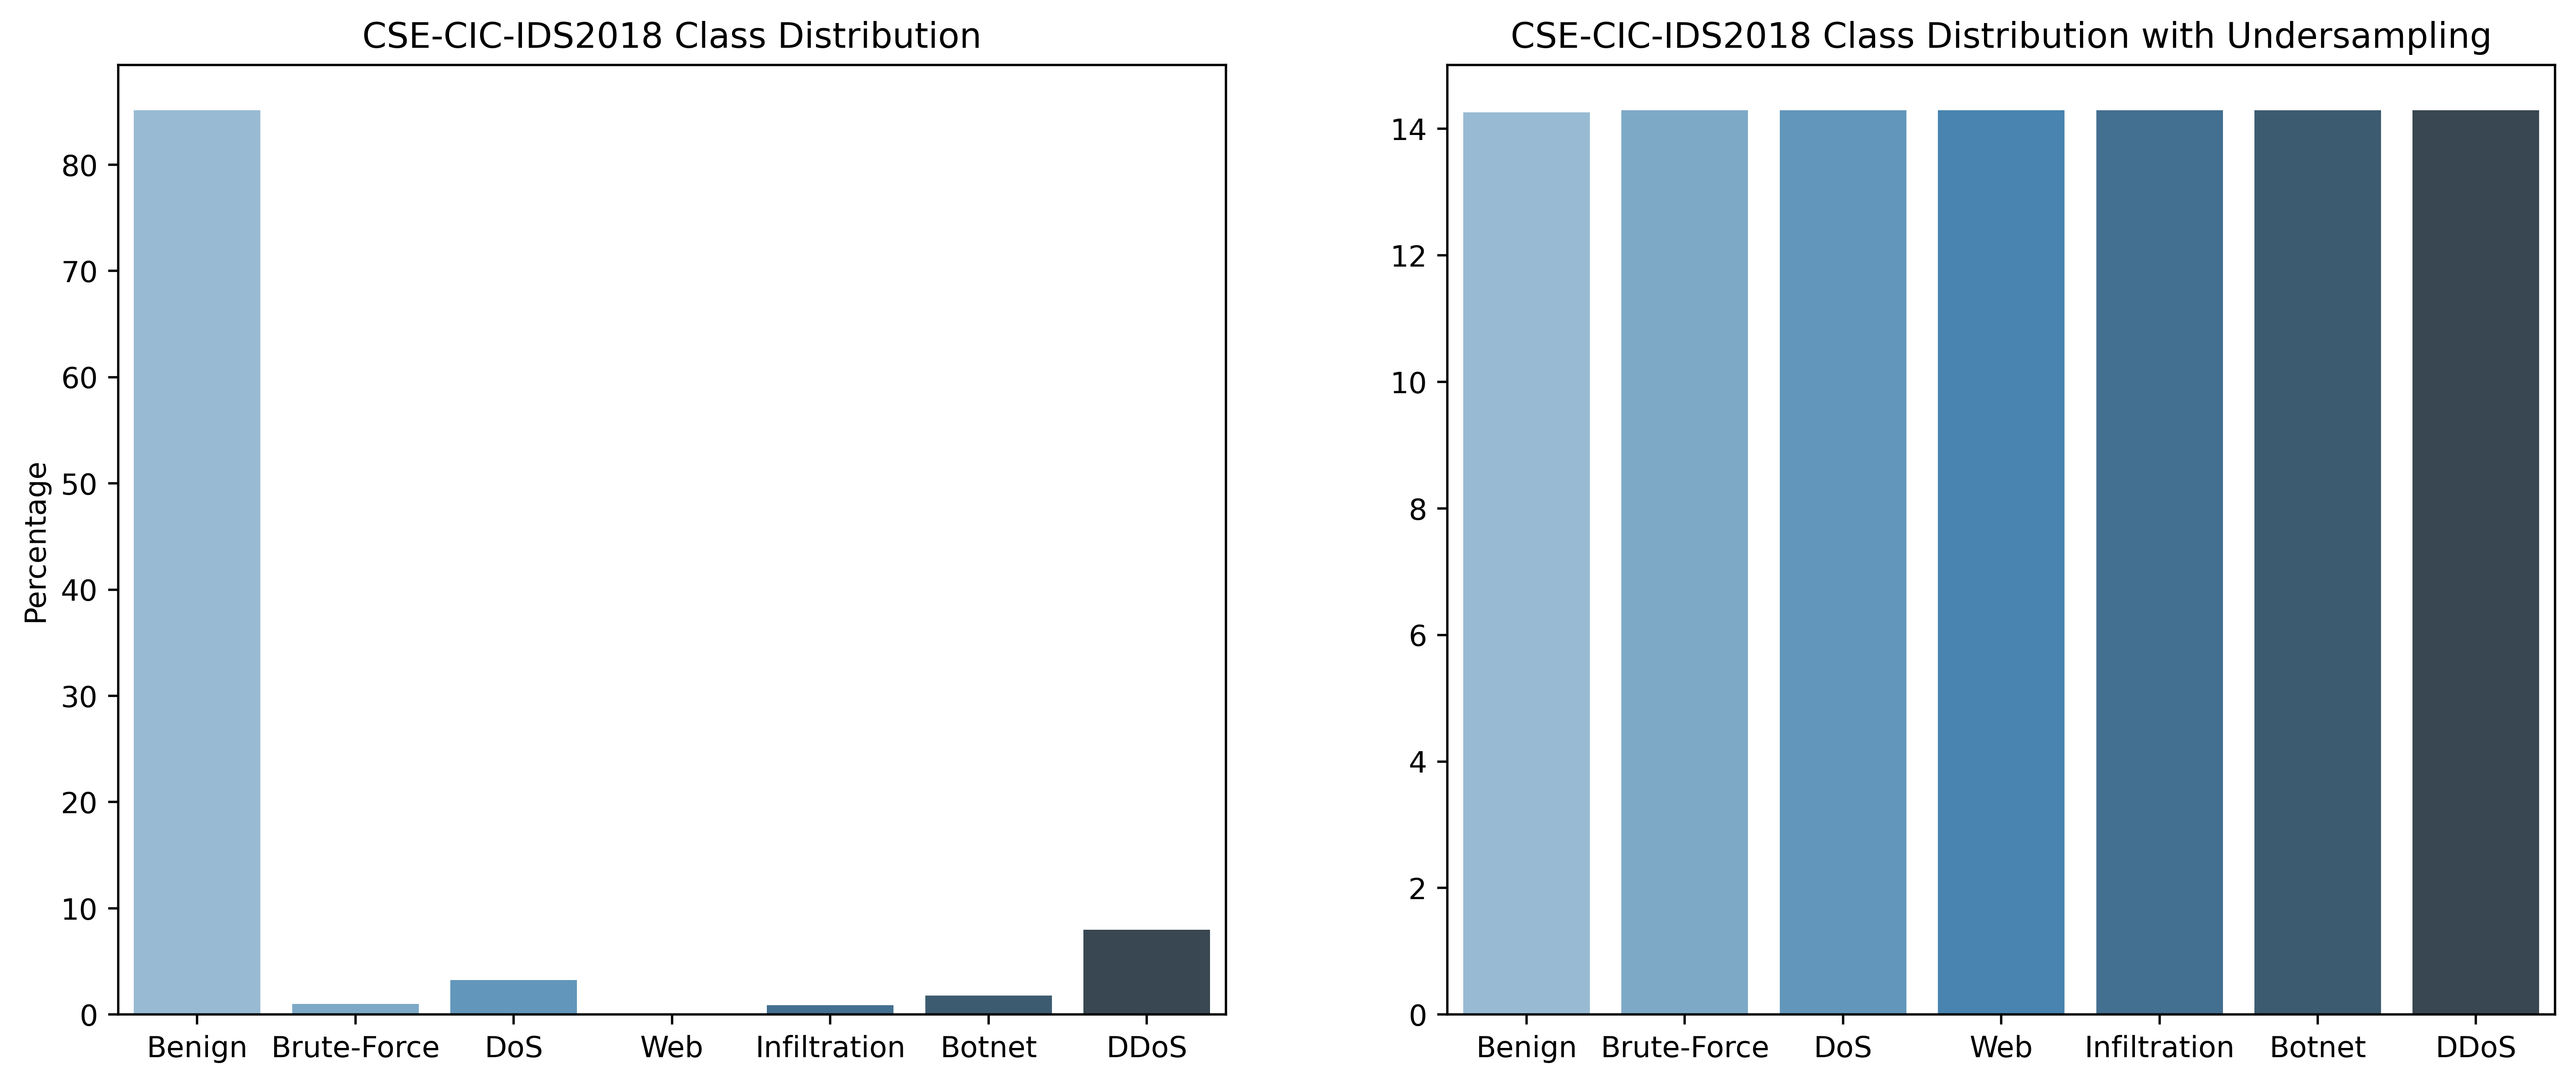

In [44]:
fig,ax = plt.subplots(nrows=1,ncols=2, figsize=(15,6),dpi=500)

sns.barplot(x="Attack Type", y = 'Percentage', data = org_distribution, palette='Blues_d', ax=ax[0])
sns.barplot(x="Attack Type", y = 'Percentage', data = new_distribtuion, palette='Blues_d', ax=ax[1])

ax[0].set_title("CSE-CIC-IDS2018 Class Distribution")
ax[1].set_title("CSE-CIC-IDS2018 Class Distribution with Undersampling")
ax[0].set_xlabel("")

ax[1].set_xlabel("")
ax[1].set_ylabel("")
plt.savefig('dist1.png')
plt.show()

In [45]:
undersampled_dataset.to_csv("undersampled_cic.csv", index=False)